<div class="alert alert-block alert-info" style="background-color:#940621;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:300%;
                                                 font-family: 'Copperplate';
                                                 border-color:#D9C10B;
                                                 border-radius:5px;
                                                 width:95%;
                                                 margin: 10;
                                                 text-align: center;"> Reservation Cancellation Prediction </div>


<div class="alert alert-block alert-info" style="background-color:#7469DD;
                                                 color:white;
                                                 padding : 20px;
                                                 font-size:150%;
                                                 font-family: 'Copperplate';
                                                 border-color:#D9C10B;
                                                 border-radius:5px;
                                                 width:95%;
                                                 margin: 10;
                                                 text-align: left;">
<ul><li> Customer behavior and booking possibilities have been radically changed by online hotel reservation channels.</li>
<li> Cancellations or no-shows cause a significant number of hotel reservations to be cancelled.</li>
<li> Cancellations can be caused by a variety of factors, such as scheduling conflicts, changes in plans, etc. </li>
<li> In many cases, this is made easier by the possibility of doingso free or at a low cost, which is beneficial for hotel guests but less desirable and possibly revenue-diminishing for hotels.
    </li></ul>
</div> 


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700">Dataset Description</div>
            
### The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below

#### `Booking_ID`: unique identifier of each booking
#### `No of adults`: Number of adults
#### `No of children`: Number of Children
#### `noofweekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
#### `noofweek_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
#### `typeofmeal_plan`: Type of meal plan booked by the customer:
#### `requiredcarparking_space`: Does the customer require a car parking space? (0 - No, 1- Yes)
#### `roomtypereserved`: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
#### `lead_time`: Number of days between the date of booking and the arrival date
#### `arrival_year`: Year of arrival date
#### `arrival_month`: Month of arrival date
#### `arrival_date`: Date of the month
#### `Market segment type`: Market segment designation.
#### `repeated_guest`: Is the customer a repeated guest? (0 - No, 1- Yes)
#### `noofprevious_cancellations`: Number of previous bookings that were cancelled by the customer prior to the current booking
#### `noofpreviousbookingsnot_canceled`: Number of previous bookings not cancelled by the customer prior to the current booking
#### `avgpriceper_room`: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
#### `noofspecial_requests`: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
#### `booking_status`: Flag indicating if the booking was canceled or not.

<div style = 'border: 3px solid #D9C10B;'>

## Importing the required libraries

In [93]:
import tensorflow as tf
import seaborn as sns

rc = {
    "axes.facecolor": "#736E6E",
    "figure.facecolor": "F9EEF0",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4}
sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization
from keras import regularizers
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

## Reading the original dataset (as dataframe) available on this link: 
https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction

In [94]:
original_df = pd.read_csv('../data/train/train.csv')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [95]:
original_df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


#### Unpredictably, the original_df don't have the booking Id column. Still, we don't need that for training, so let's ignore that. The dataset provided for this competition does contain the booking ids for each of the transactions

### The dataset provided for the competition is imported in `train_df` and `test_df` dataframes

In [96]:
train_df = pd.read_csv('../data/train/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [97]:
train_df = pd.concat([train_df,original_df])
train_df = train_df.sample(frac=1)
train_df = train_df.reset_index(drop=True)
y_train = train_df['booking_status']
train_df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,27214,2,0,0,4,0,0,0,235,2018,10,26,1,0,0,0,96.3,3,0
1,7682,2,1,0,2,0,0,0,26,2018,9,15,1,0,0,0,159.0,2,0
2,38526,3,0,1,1,0,0,1,100,2018,7,18,1,0,0,0,143.7,0,0
3,1157,2,0,1,3,0,0,0,254,2018,7,29,1,0,0,0,100.3,0,1
4,13220,2,0,0,3,0,0,0,277,2018,10,20,1,0,0,0,96.3,3,0


In [98]:
y_train.value_counts()


booking_status
0    51192
1    33008
Name: count, dtype: int64

### Number of items in classes are somewhat unbalanced.

In [99]:
test_df = pd.read_csv('../data/test/test.csv')
test_df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700">Checking the unique values in each of the categorical columns</div>

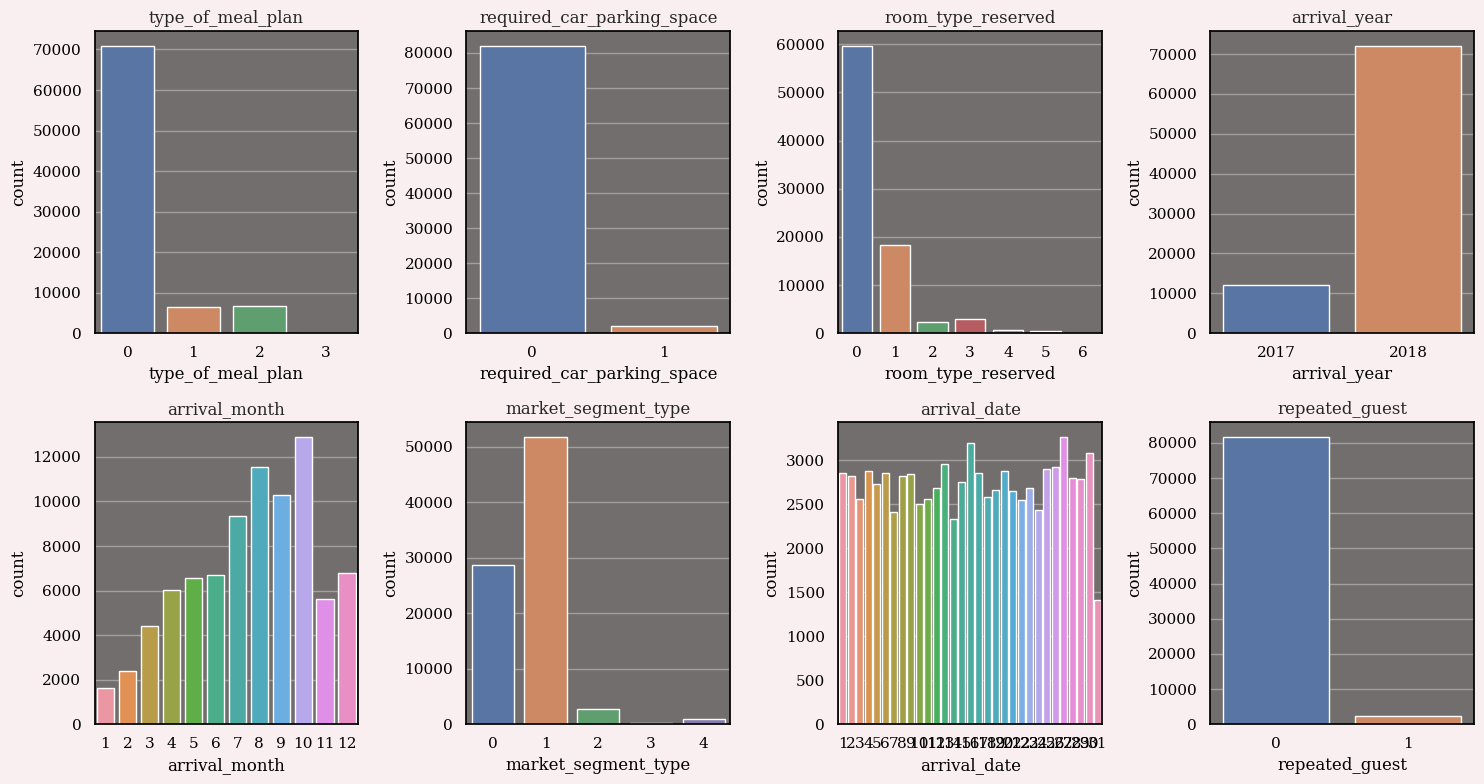

In [100]:
cat_cols = ['type_of_meal_plan','required_car_parking_space','room_type_reserved','arrival_year','arrival_month','market_segment_type','arrival_date','repeated_guest']


# Setting up a grid of plots with the appropriate number of rows and columns
n_rows = (len(cat_cols) + 1) // 4
fig, axs = plt.subplots(n_rows, 4, figsize=(15, 4*n_rows))

# Iterating through each categorical column and plotting the count of unique values
for i, col in enumerate(cat_cols):
    sns.countplot(data=train_df, x=col, ax=axs[i//4, i%4])
    axs[i//4, i%4].set_title(col)

# If there are an odd number of categorical columns,we will remove the unused plot using the command below
if len(cat_cols) % 2 != 0:
    fig.delaxes(axs[-1,-1])

# Displaying the plot
plt.tight_layout()
plt.show()

In [101]:
train_df.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [102]:
test_df_id = test_df['id']

In [103]:
train_df.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000,84200.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.295332,0.524947,0.450126,0.885688,1.427321,0.587670,0.156883,0.832600,81.068861,0.350793,2.829379,8.888530,0.633525,0.168346,0.325835,1.732111,37.138945,0.775036,0.488204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700"> Applying One-Hot encoding on each of the categorical columns </div>

In [104]:
train_dumm_list = []
test_dumm_list = []

for col in cat_cols:
    encoder = OneHotEncoder()
    dumm_train_df = pd.DataFrame(encoder.fit_transform(train_df[[col]]).toarray(),columns = encoder.get_feature_names_out(train_df[[col]].columns))
    dumm_test_df= pd.DataFrame(encoder.transform(test_df[[col]]).toarray(),columns = encoder.get_feature_names_out(test_df[[col]].columns))
    train_dumm_list.append(dumm_train_df)
    test_dumm_list.append(dumm_test_df)

concat_dumm = pd.concat(train_dumm_list,axis = 1)
concat_dumm_test = pd.concat(test_dumm_list,axis = 1)
concat_dumm

,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,required_car_parking_space_0,required_car_parking_space_1,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,...,arrival_date_24,arrival_date_25,arrival_date_26,arrival_date_27,arrival_date_28,arrival_date_29,arrival_date_30,arrival_date_31,repeated_guest_0,repeated_guest_1
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84195,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
84196,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
84197,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
84198,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [105]:
concat_dumm_test

,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,required_car_parking_space_0,required_car_parking_space_1,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,...,arrival_date_24,arrival_date_25,arrival_date_26,arrival_date_27,arrival_date_28,arrival_date_29,arrival_date_30,arrival_date_31,repeated_guest_0,repeated_guest_1
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
28064,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28065,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28066,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Scaling the numerical columns

In [106]:
numerical_cols = [ 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']
scaled_train_list =[]
scaled_test_list = []
for col in numerical_cols : 
    scaler = RobustScaler()
    scaled_train_df = pd.DataFrame(scaler.fit_transform(train_df[[col]]),columns =train_df[[col]].columns)
    scaled_test_df =  pd.DataFrame(scaler.transform(test_df[[col]]),columns = test_df[[col]].columns)
    scaled_train_list.append(scaled_train_df)
    scaled_test_list.append(scaled_test_df)

concat_scaled_df = pd.concat(scaled_train_list,axis = 1)
concat_test_scaled_df = pd.concat(scaled_test_list,axis =1)
concat_test_scaled_df


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.0,0.0,0.0,1.0,0.152542,0.0,0.0,0.372979,2.0
1,0.0,0.0,-0.5,0.5,-0.601695,0.0,0.0,-0.333718,0.0
2,0.0,2.0,-0.5,-0.5,-0.635593,0.0,0.0,3.245958,1.0
3,0.0,0.0,-0.5,0.5,-0.042373,0.0,0.0,-0.431871,0.0
4,-1.0,0.0,-0.5,0.0,-0.728814,0.0,0.0,1.028868,0.0
...,...,...,...,...,...,...,...,...,...
28063,0.0,0.0,0.0,0.0,1.881356,0.0,0.0,1.398383,0.0
28064,0.0,0.0,0.5,0.0,-0.101695,0.0,0.0,-0.795612,1.0
28065,0.0,0.0,0.0,0.0,-0.449153,0.0,0.0,-0.333718,0.0
28066,1.0,0.0,-0.5,1.0,-0.754237,0.0,0.0,1.461894,0.0


# Joining the scaled and one-hot encoded columns to be used as training

In [107]:
X_train = pd.concat([concat_dumm,concat_scaled_df],axis =1).to_numpy()
y_train = y_train.to_numpy()
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.07274827,  3.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.37528868,  2.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.02193995,  0.        ],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.56466513,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.11431871,  1.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.66997691,  2.        ]])

# Joining the scaled, one-hot encoded columns to be used for testing

In [108]:
X_test = pd.concat([concat_dumm_test,concat_test_scaled_df],axis =1)
X_test

,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,required_car_parking_space_0,required_car_parking_space_1,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,...,repeated_guest_1,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.152542,0.0,0.0,0.372979,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.5,0.5,-0.601695,0.0,0.0,-0.333718,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,-0.5,-0.5,-0.635593,0.0,0.0,3.245958,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.5,0.5,-0.042373,0.0,0.0,-0.431871,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-1.0,0.0,-0.5,0.0,-0.728814,0.0,0.0,1.028868,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.881356,0.0,0.0,1.398383,0.0
28064,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.0,-0.101695,0.0,0.0,-0.795612,1.0
28065,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.449153,0.0,0.0,-0.333718,0.0
28066,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,-0.5,1.0,-0.754237,0.0,0.0,1.461894,0.0


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700"> Defining the Model Architecture and appropriate loss function and metrices</div>

In [109]:
pip install focal_loss

Note: you may need to restart the kernel to use updated packages.


In [110]:
from focal_loss import BinaryFocalLoss
model = Sequential()

# Add layers to the model
model.add(Dense(8116, input_dim=X_train.shape[1], activation='relu')) #input layer with 64 neurons
model.add(Dropout(0.5))
model.add(Dense(4096,activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2048,activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'selu'))
model.add(Dropout(0.1))
model.add(Dense(8,activation= 'relu'))
model.add(Dense(1, activation='sigmoid')) #output layer with 1 neuron 
model.compile(loss=[BinaryFocalLoss(gamma =1)], optimizer= tf.keras.optimizers.Nadam(4e-5),metrics = [tf.keras.metrics.AUC(num_thresholds=700000,curve='ROC')])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 8116)              608700    
                                                                 
 dropout_15 (Dropout)        (None, 8116)              0         
                                                                 
 dense_22 (Dense)            (None, 4096)              33247232  
                                                                 
 dropout_16 (Dropout)        (None, 4096)              0         
                                                                 
 dense_23 (Dense)            (None, 2048)              8390656   
                                                                 
 dropout_17 (Dropout)        (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 256)              

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700">Training the model</div>

In [111]:
# model.fit(X_train,y_train,validation_split = 0.26,batch_size = 256,epochs = 15)



Epoch 1/15
 60/244 [======>.......................] - ETA: 2:32 - loss: 0.2821 - auc_3: 0.7625

244/244 [==============================] - 209s 847ms/step - loss: 0.2490 - auc_3: 0.8292 - val_loss: 0.2288 - val_auc_3: 0.8617
Epoch 2/15
244/244 [==============================] - 216s 885ms/step - loss: 0.2312 - auc_3: 0.8574 - val_loss: 0.2237 - val_auc_3: 0.8670
Epoch 3/15
244/244 [==============================] - 206s 842ms/step - loss: 0.2270 - auc_3: 0.8632 - val_loss: 0.2210 - val_auc_3: 0.8706
Epoch 4/15
244/244 [==============================] - 200s 820ms/step - loss: 0.2235 - auc_3: 0.8679 - val_loss: 0.2190 - val_auc_3: 0.8731
Epoch 5/15
216/244 [=========================>....] - ETA: 22s - loss: 0.2217 - auc_3: 0.8701

KeyboardInterrupt: 

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700">Getting the feature importances</div>

In [ ]:
# Get the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Get the absolute values of the weights
importances = np.abs(weights)

# Normalize the importances
importances = importances / importances.sum(axis=0)

# Print the importances of each feature
for i, importance in enumerate(importances):
    print("Feature", i, "Importance", np.median(importance))


Feature 0 Importance 0.012709249
Feature 1 Importance 0.01318764
Feature 2 Importance 0.013229873
Feature 3 Importance 0.013379417
Feature 4 Importance 0.0125897555
Feature 5 Importance 0.013986961
Feature 6 Importance 0.012770936
Feature 7 Importance 0.013355853
Feature 8 Importance 0.013366216
Feature 9 Importance 0.013242992
Feature 10 Importance 0.013655335
Feature 11 Importance 0.013393121
Feature 12 Importance 0.013346156
Feature 13 Importance 0.013480963
Feature 14 Importance 0.012881836
Feature 15 Importance 0.013622214
Feature 16 Importance 0.013482608
Feature 17 Importance 0.013418075
Feature 18 Importance 0.013406535
Feature 19 Importance 0.013349268
Feature 20 Importance 0.013267174
Feature 21 Importance 0.01331949
Feature 22 Importance 0.013363473
Feature 23 Importance 0.013201034
Feature 24 Importance 0.01308431
Feature 25 Importance 0.013281103
Feature 26 Importance 0.014029697
Feature 27 Importance 0.013350888
Feature 28 Importance 0.013122145
Feature 29 Importance 0.01

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700">Trying a simple LGBM model</div>

In [113]:
from datetime import datetime
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split



X_train_lgb, X_val, y_train_lgb, y_val = train_test_split(X_train,y_train,test_size = 0.36,stratify =y_train)


lgbm_params = {'learning_rate':0.015, 'boosting_type':'dart',  
              'objective':'binary',
              'metric':['auc', 'binary_logloss'],
              'num_leaves':150,
              'max_depth':19}

start=datetime.now()

d_train = lgb.Dataset(X_train, label=y_train)
model_lgb = lgb.train(lgbm_params, d_train, 1000) 


stop=datetime.now()
execution_time_lgbm = stop-start



[LightGBM] [Info] Number of positive: 33008, number of negative: 51192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 84200, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392019 -> initscore=-0.438833
[LightGBM] [Info] Start training from score -0.438833


In [114]:
X = X_train
y = y_train

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700"> Random Forest Model with SMOTE upsampling</div>

Reference : https://www.kaggle.com/code/marcinrutecki/smote-and-tomek-links-for-imbalanced-data

In [121]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
SMOTETomek_pipeline = make_pipeline(SMOTETomek(tomek=TomekLinks(sampling_strategy='all')), 
                              RandomForestClassifier(n_estimators=250, max_depth=20,criterion = 'entropy', random_state=9,verbose = 1))

In [122]:
SMOTETomek_rf = SMOTETomek_pipeline
start=datetime.now()
SMOTETomek_rf.fit(X_train, y_train)
stop=datetime.now()
execution_time_rf= stop-start
print(f'Execution Time: {execution_time_rf}')

AttributeError: 'NoneType' object has no attribute 'split'

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700">Prediction on X_test</div>

#### 1. For Neural Network

In [123]:

y_pred_nn_val = model.predict(X_val)
for i in range(0, X_val.shape[0]):
    if y_pred_nn_val[i]>=0.5:       # setting threshold to 0.5
       y_pred_nn_val[i]=1
    else:  
       y_pred_nn_val[i]=0

948/948 [==============================] - 21s 22ms/step


In [125]:
y_pred = model.predict(X_test)

ValueError: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>

<AxesSubplot:>

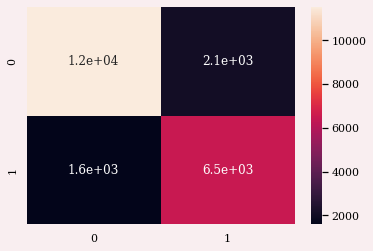

In [ ]:
#Confusion matrix for neural network
cm_lgbm_nn = confusion_matrix(y_val, y_pred_nn_val)
sns.heatmap(cm_lgbm_nn, annot=True)

#### 2. LGBM

In [117]:
#on the validation set
y_pred_lgbm_val=model_lgb.predict(X_val)
for i in range(0, X_val.shape[0]):
    if y_pred_lgbm_val[i]>=0.5:       # setting threshold to 0.5
       y_pred_lgbm_val[i]=1
    else:  
       y_pred_lgbm_val[i]=0

In [118]:
#on the test set
y_pred_lgbm = model_lgb.predict(X_test)
print(y_pred_lgbm)

[0.14516919 0.0798812  0.34888855 ... 0.11297432 0.47180377 0.90392056]


<Axes: >

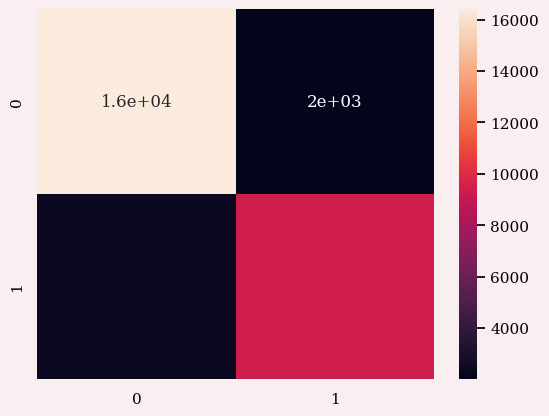

In [119]:
#Confusion matrix for lgbm
cm_lgbm = confusion_matrix(y_val, y_pred_lgbm_val)
sns.heatmap(cm_lgbm, annot=True)

#### 3. Random Forest with SMOTE Tomek

In [ ]:
#on the validation set
y_pred_rf_val=SMOTETomek_rf.predict(X_val)
for i in range(0, X_val.shape[0]):
    if y_pred_rf_val[i]>=0.5:       # setting threshold to 0.5
       y_pred_rf_val[i]=1
    else:  
       y_pred_rf_val[i]=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.1s finished


In [ ]:
y_pred_rf = SMOTETomek_rf.predict_proba(X_test)
y_pred_rf = y_pred_rf[:,1]
print(y_pred_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.15728687 0.071497   0.3472855  ... 0.19620258 0.69448087 0.92579915]


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.3s finished


<AxesSubplot:>

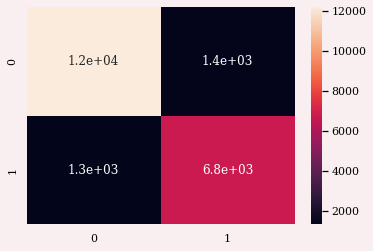

In [ ]:
#Confusion matrix for Random Fores
cm_class_nn = confusion_matrix(y_val, y_pred_rf_val)
sns.heatmap(cm_class_nn, annot=True)

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700">Classification Report</div>

In [ ]:
from sklearn.metrics import classification_report
from tabulate import tabulate
RESET = "\033[0m"
RED = "\033[91m"
BROWN = "\033[0;33m"
BLUE = "\033[94m"
BOLD = "\033[1m"
# y_true: true labels of the test set
# y_pred: predicted labels of the test set
def c_report(y_pred,y_val):
    report = classification_report(y_pred, y_val, output_dict=True)

# Format the report as a table
    headers = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']
    table = []
    for class_name, scores in report.items():
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
            precision = scores['precision']
            recall = scores['recall']
            f1_score = scores['f1-score']
            support = scores['support']
            table.append([class_name, precision, recall, f1_score, support])

    table.append(['', '', '', '', ''])
    table.append(['Macro Avg', report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], report['macro avg']['support']])
    table.append(['Weighted Avg', report['weighted avg']['precision'], report['weighted avg']['recall'], report['weighted avg']['f1-score'], report['weighted avg']['support']])

    # Adding color coding to the table
    for row in table:
        for i, cell in enumerate(row):
            if isinstance(cell, float):
                row[i] = f'{cell:.2f}'
                if cell > 0.8:
                    row[i] = '\033[92m' + row[i] + '\033[0m'  # Green color for high scores
                elif cell < 0.6:
                    row[i] = '\033[91m' + row[i] + '\033[0m'  # Red color for low scores
    print(tabulate(table, headers=headers))
print(f'{RED}{BOLD}Classification Report for Neural Network:{RESET}\n')
c_report(y_pred_nn_val, y_val)
print(f'\n\n{BLUE}{BOLD}Classification Report for LGBM:{RESET}\n')
c_report(y_pred_lgbm_val, y_val)
print(f'\n\n{BROWN}{BOLD}Classification Report for Random Forest:{RESET}\n')
c_report(y_pred_rf_val, y_val)

Classification Report for Neural Network:

Class         Precision    Recall    F1-Score    Support
------------  -----------  --------  ----------  ---------
0.0           0.85         0.88      0.86        13119
1.0           0.80         0.76      0.78        8567

Macro Avg     0.83         0.82      0.82        21686
Weighted Avg  0.83         0.83      0.83        21686


Classification Report for LGBM:

Class         Precision    Recall    F1-Score    Support
------------  -----------  --------  ----------  ---------
0.0           0.91         0.88      0.89        14076
1.0           0.78         0.83      0.81        7610

Macro Avg     0.84         0.85      0.85        21686
Weighted Avg  0.86         0.86      0.86        21686


Classification Report for Random Forest:

Class         Precision    Recall    F1-Score    Support
------------  -----------  --------  ----------  ---------
0             0.90         0.90      0.90        13529
1             0.84         0.83    

In [120]:
# print ("Accuracy with Neural Network is = ", metrics.accuracy_score(y_pred_nn_val,y_val))
# print("AUC score with Neural Network is: ", roc_auc_score(y_pred_nn_val, y_val))
print ("Accuracy with LGBM = ", metrics.accuracy_score(y_pred_lgbm_val,y_val))
print("AUC score with LGBM is: ", roc_auc_score(y_pred_lgbm_val, y_val))
# print ("Accuracy with Random Forest = ", metrics.accuracy_score(y_pred_rf_val,y_val))
# print("AUC score with Random Forest is: ", roc_auc_score(y_pred_rf_val, y_val))

Accuracy with LGBM =  0.8517748746371074
AUC score with LGBM is:  0.8461329481961479


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#736B69;
            overflow:hidden;
            font-weight:700">Conversion of DataFrame in required format for submission to the competition</div>

In [ ]:
y_pred_lgbm = pd.DataFrame(y_pred_rf)
y_pred_lgbm.columns = ['booking_status']
submissions_df = pd.DataFrame(pd.concat([test_df_id,y_pred_lgbm],axis = 1))
submissions_df = submissions_df.reset_index(drop = True)

submissions_df.to_csv('submission.csv', index=False)
submissions_df.head()

,id,booking_status
0,42100,0.157287
1,42101,0.071497
2,42102,0.347285
3,42103,0.127183
4,42104,0.511323


### Please upvote if you find it useful. Thanks